This part of the assignment is to get you introduced to using gradient descent within torch. You will be using input\
”data” generated (and visualised) like this:

(-0.0068612724542617826,
 1.8778524428606034,
 -0.033335728943347936,
 1.8826763764023782)

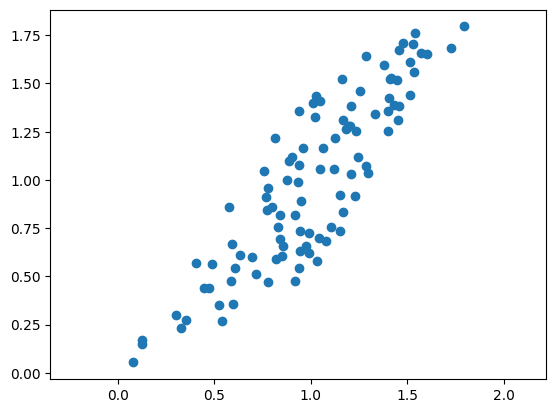

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import torch
# make up some data for x
D = 2
x= torch.rand(100,D)
x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

An autoencoder is an unsupervised learner that carries out dimensionality reduction by mapping the data into a lower dimensional space and back ”out” again to form a ”reconstruction”. \
The loss is some measure of the difference between the original data items and their reconstructions.\
![pic](assets/pic1.jpg "Magic Gardens")

## Encoder function
### Input
* the shape of input x: (1,2)
* w_encoder: weight of encoder
* b_encoder: bias of encoder
### Output
* the shape of output: z (1)
### Variable
* encoder:\
 $z = x_0*w{0_encoder} + x_1*w{1encoder} + b_{encoder}$
* an encoder, which takes the 2-d inputs and produces a 1-dimensional z via a weighted sum plus a bias. 
* The encoder weights will be a 1-by-2 tensor and the encoder bias will be a 1-by-1 tensor.

In [24]:
def encoder(x, w_encoder, b_encoder):
    # Encoder: z = x0*w0_encoder + x_1*w_1_encoder + b_encoder
    z = torch.mm(x,w_encoder) + b_encoder
    return z

In [25]:
def decoder(z,w_decoder,b_decoder):
    z = torch.mm(w_decoder,z) + b_decoder
    return z

In [26]:
import torch
#import torch.nn.functional.mse_loss as MSE
import torch.nn.functional as F
def loss(predict,target):
    return F.mse_loss(predict,target)

In [27]:
def f(x,w):
    wEncoder = w[0]
    wDecoder = w[1]
    bEncoder = w[2]
    bDecoder = w[3]
    v_encoded = encoder(x,wEncoder,bEncoder)
    v_decoded = decoder(v_encoded,wEncoder,bEncoder)
    return v_decoded

In [28]:
# plot loss function
def plotloss(losses,epoches,name):
    plt.plot(epoches,losses)
    plt.title("losses verse epoches in " + name)
    plt.xlabel("epoches")
    plt.ylabel("loss")

In [33]:
import matplotlib.pyplot as plt
# plot function
def plot(x,x_reconstruction,wEncoder,name):
    plt.figure(figsize=(10,10))
    plt.plot([0,wEncoder.detach()[0,0]], [0,wEncoder.detach()[1,0]],'-r')
    plt.scatter(x[:,0].detach().numpy(),x[:,1].detach().numpy(),color='cyan')
    plt.scatter(x_reconstruction.detach()[:,0],x_reconstruction.detach()[:,1])
    plt.axis('equal')

    plt.figure(figsize=(10,10))
    plotloss(losses,epochses,name)
    print("ratio in dimension1: " + str(wEncoder.detach()[0,0].numpy()/wDecoder.detach()[0,1].numpy()))
    print("ratio in dimension2: " + str(wEncoder.detach()[1,0].numpy()/wDecoder.detach()[0,1].numpy()))

epoch 1, loss: 0.64497495
epoch 2, loss: 0.50458926
epoch 3, loss: 0.40577957
epoch 4, loss: 0.33435085
epoch 5, loss: 0.28158292
epoch 6, loss: 0.24189113
epoch 7, loss: 0.21157488
epoch 8, loss: 0.188111
epoch 9, loss: 0.16973762
epoch 10, loss: 0.15519887
epoch 11, loss: 0.14358376
epoch 12, loss: 0.13422124
epoch 13, loss: 0.12661026
epoch 14, loss: 0.12037247
epoch 15, loss: 0.11521903
epoch 16, loss: 0.110927485
epoch 17, loss: 0.10732502
epoch 18, loss: 0.10427652
epoch 19, loss: 0.101675555
epoch 20, loss: 0.09943785
epoch 21, loss: 0.09749629
epoch 22, loss: 0.09579719
epoch 23, loss: 0.09429739
epoch 24, loss: 0.092962086
epoch 25, loss: 0.09176312
epoch 26, loss: 0.0906776
epoch 27, loss: 0.08968687
epoch 28, loss: 0.08877568
epoch 29, loss: 0.08793159
epoch 30, loss: 0.087144285
epoch 31, loss: 0.08640535
epoch 32, loss: 0.08570779
epoch 33, loss: 0.085045844
epoch 34, loss: 0.08441471
epoch 35, loss: 0.08381043
epoch 36, loss: 0.08322962
epoch 37, loss: 0.082669556
epoch 3

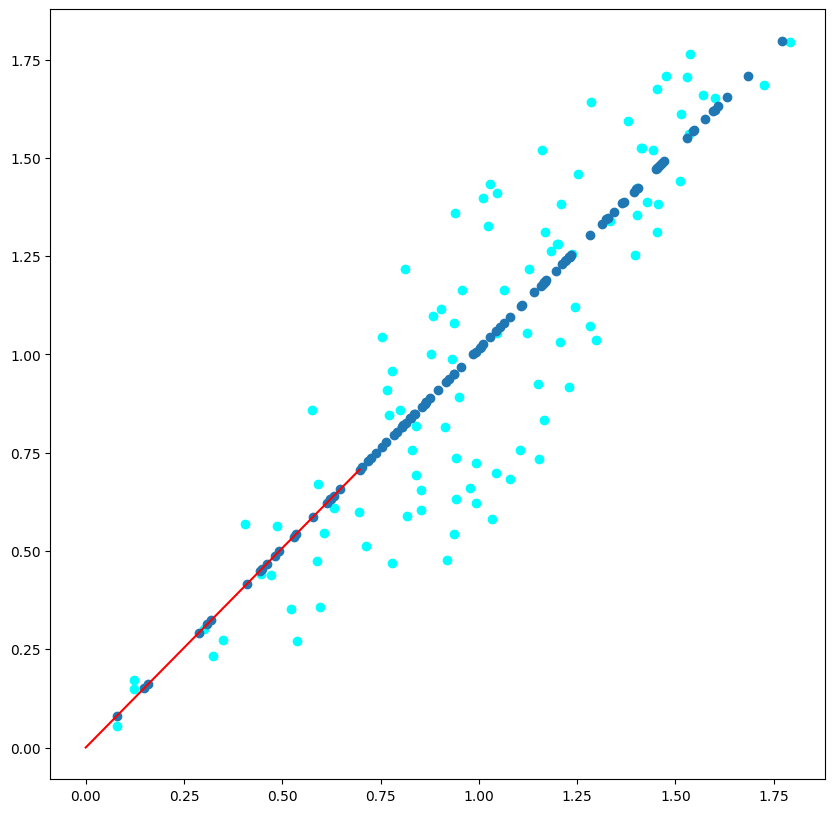

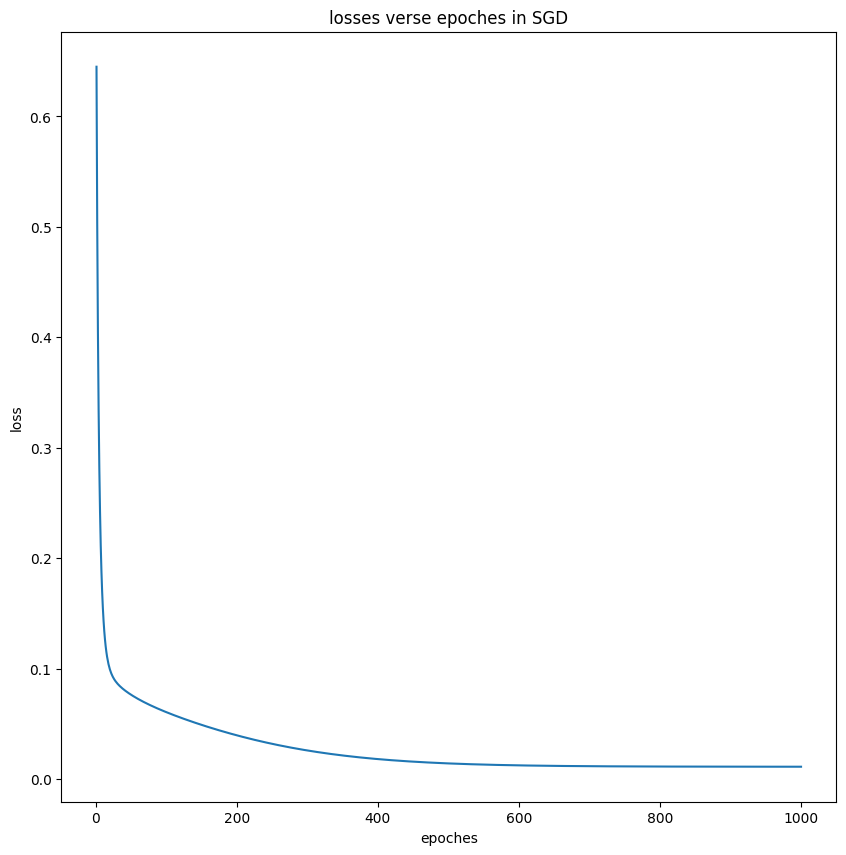

In [34]:
STEPS = 1000
# init the weights and biass in encoder and decoder
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
w = [wEncoder,wDecoder,bEncoder,bDecoder]

# init the SGD optim
opt = torch.optim.SGD(params=w, lr=0.01, momentum=0)
losses = []
epochses = []
epochs = 0

for t in range(STEPS):
    epochs = epochs + 1
    x_reconstruction = torch.rand(100,D)

    # calculate y   
    for i in range(100):
        t = torch.tensor([[x[i,0],x[i,1]]])
        x_reconstruction[i] = f(t,w).T

    # 偏Partial derivative zeroing
    opt.zero_grad()
    l = loss(x_reconstruction,x.detach())
    losses.append(l.detach().numpy())
    epochses.append(epochs)
    print("epoch "+ str(epochs) + ", loss: "+ str(l.detach().numpy()))
    l.backward()
    opt.step()
# print the ratio of weights of encoder and decoder in two demiensons
# plot scatterplot and a line from the origin to vector formed by the two learned encoder weights
# plot the losses verse epoches
plot(x,x_reconstruction,wEncoder,"SGD")

ratio in dimension1: 1.523504
ratio in dimension2: 1.54517


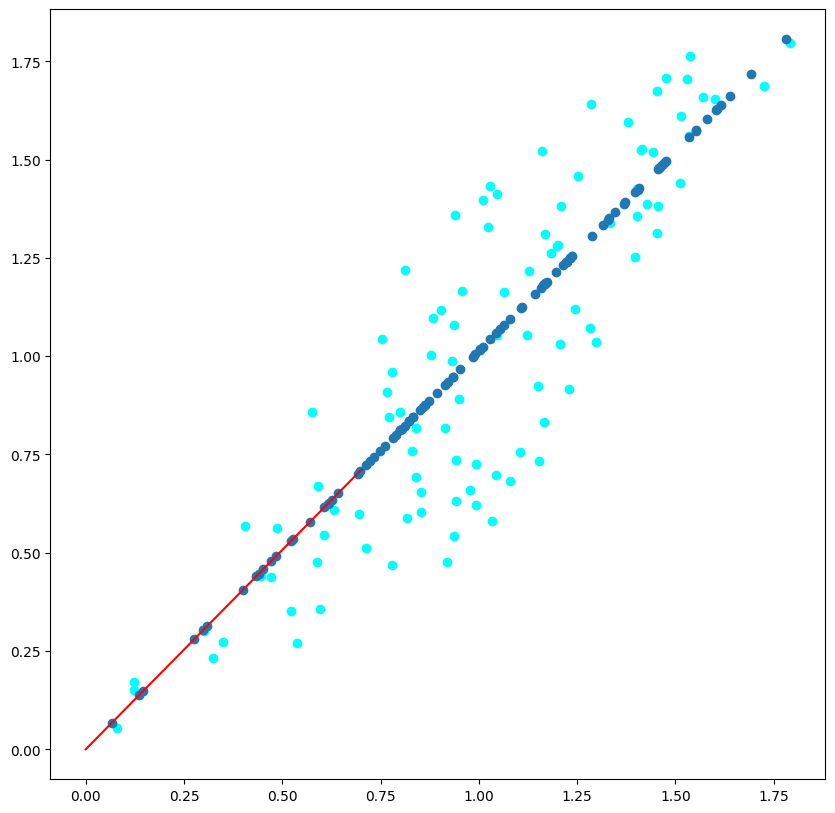

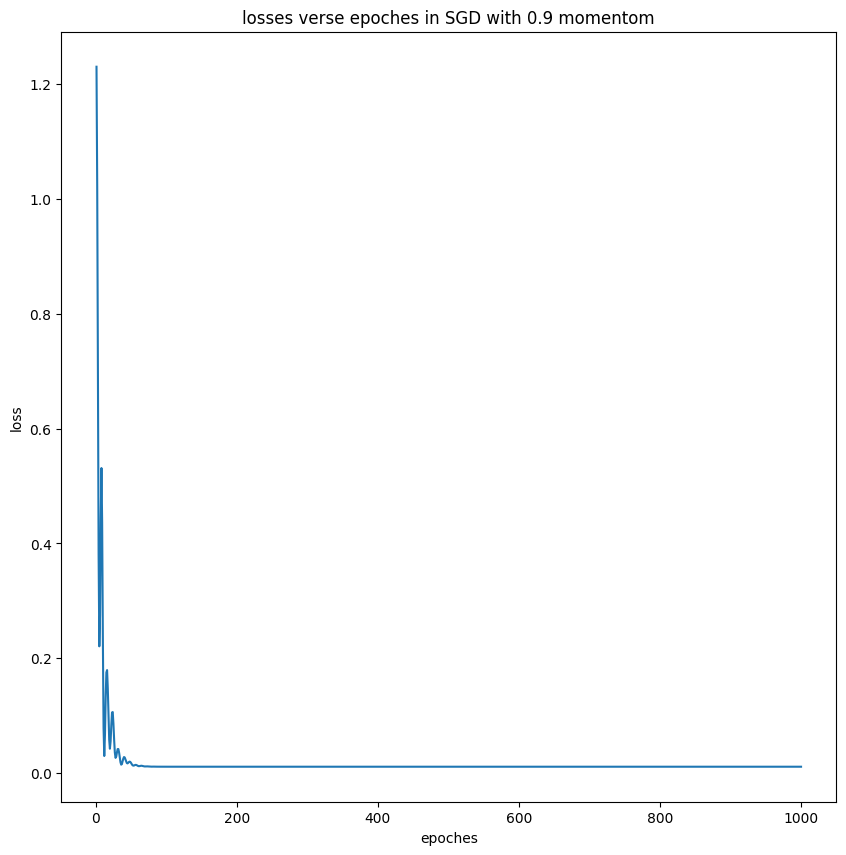

In [52]:
STEPS = 1000
# init the weights and biass in encoder and decoder
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
w = [wEncoder,wDecoder,bEncoder,bDecoder]

# init the SGD optim
opt = torch.optim.SGD(params=w, lr=0.01, momentum=0.9)
losses = []
epochses = []
epochs = 0

for t in range(STEPS):
    epochs = epochs + 1
    x_reconstruction = torch.rand(100,D)

    # calculate y   
    for i in range(100):
        t = torch.tensor([[x[i,0],x[i,1]]])
        x_reconstruction[i] = f(t,w).T

    # Partial derivative zeroing
    opt.zero_grad()

    # calculate the loss
    l = loss(x_reconstruction,x.detach())
    losses.append(l.detach().numpy())
    epochses.append(epochs)
    #print("epoch "+ str(epochs) + ", loss: "+ str(l.detach().numpy()))
    # backward
    l.backward()
    opt.step()

# print the ratio of weights of encoder and decoder in two demiensons
# plot scatterplot and a line from the origin to vector formed by the two learned encoder weights
# plot the losses verse epoches
plot(x,x_reconstruction,wEncoder,"SGD with 0.9 momentom")

ratio in dimension1: -0.9241971
ratio in dimension2: -0.937473


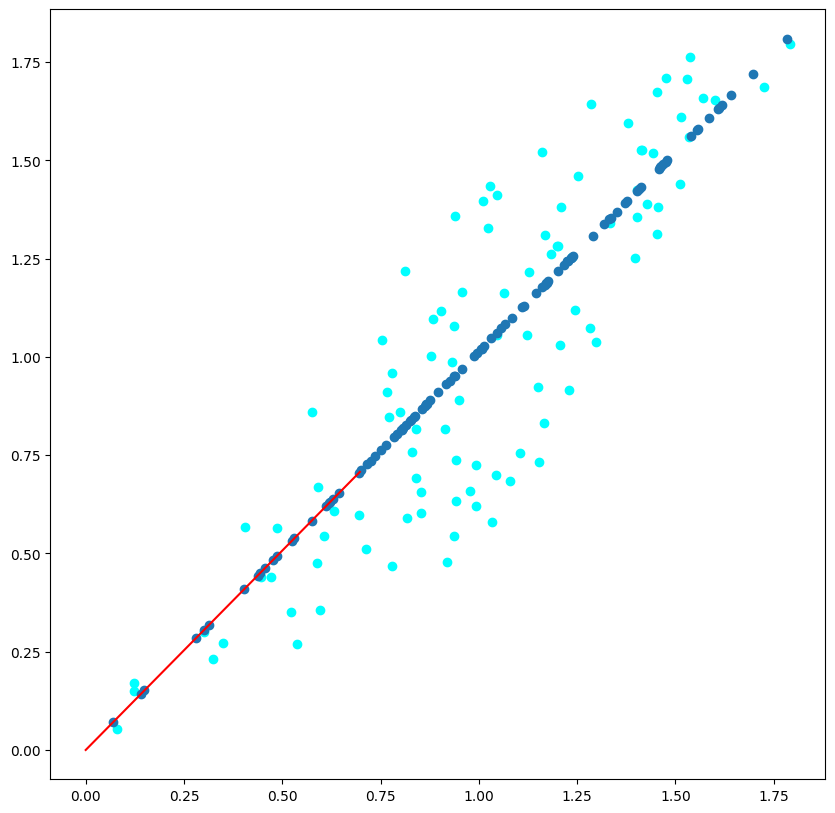

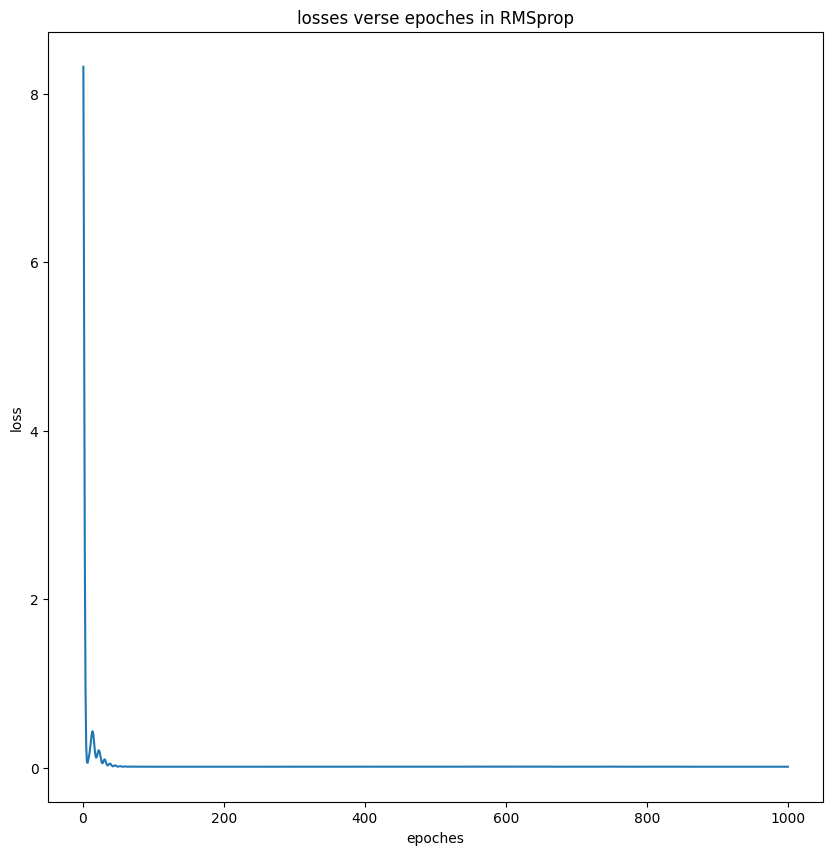

In [42]:

STEPS = 1000
# init the weights and biass in encoder and decoder
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
w = [wEncoder,wDecoder,bEncoder,bDecoder]

# init the RMS optimizer
opt = torch.optim.RMSprop(params=w, lr=0.01, momentum=0.9)
losses = []
epochses = []
epochs = 0

for t in range(STEPS):
    epochs = epochs + 1
    x_reconstruction = torch.rand(100,D)

    # calculate y   
    for i in range(100):
        t = torch.tensor([[x[i,0],x[i,1]]])
        x_reconstruction[i] = f(t,w).T

    # Partial derivative zeroing
    opt.zero_grad()
    
    # calculate the loss based on MSE
    l = loss(x_reconstruction,x.detach())
    losses.append(l.detach().numpy())
    epochses.append(epochs)

    # print("epoch "+ str(epochs) + ", loss: "+ str(l.detach().numpy()))
    # backward
    l.backward()
    opt.step()

# print the ratio of weights of encoder and decoder in two demiensons
# plot scatterplot and a line from the origin to vector formed by the two learned encoder weights
# plot the losses verse epoches
plot(x,x_reconstruction,wEncoder,"RMSprop")

#### In a text cell of the notebook, write a couple of concise paragraphs, interpreting what you found.

